# Alucar - Analisando as Vendas

# Tendência de Vendas

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
pd.read_csv('dados/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('dados/alucar.csv')

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [6]:
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<AxesSubplot:xlabel='mes', ylabel='vendas'>

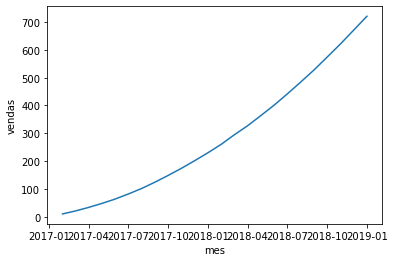

In [9]:
sns.lineplot(x='mes',y='vendas', data=alucar)

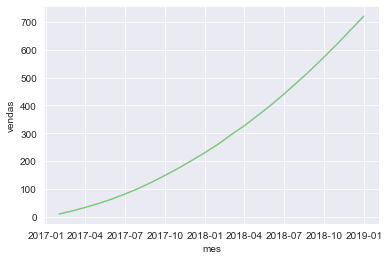

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas', data=alucar)

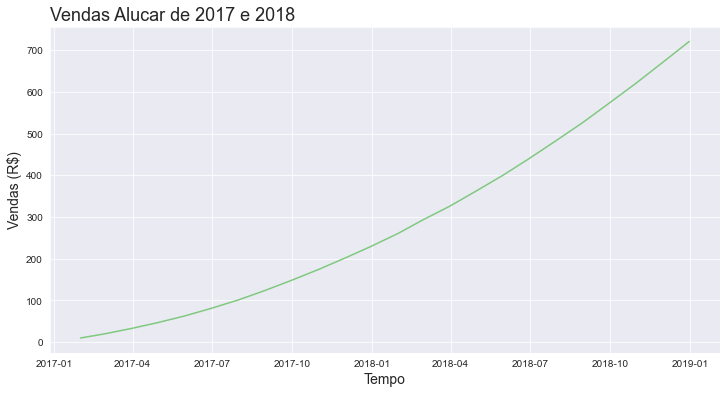

In [11]:
ax = sns.lineplot(x='mes',y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018',loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas (R$)',fontsize=14)
ax=ax

## Link útil:
>**Time series**: https://www.alura.com.br/artigos/crescimento-proporcional-entre-linhas-time-series-utilizando-pandas

# Decomposição e autocorrelação

In [13]:
alucar['aumento_vendas'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento_vendas
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


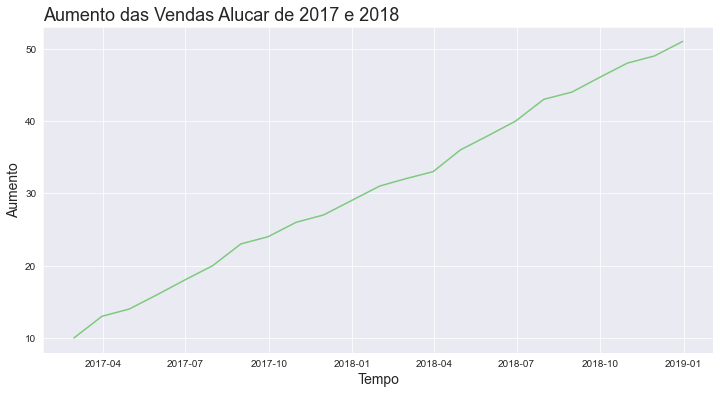

In [17]:
ax = sns.lineplot(x='mes',y='aumento_vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018',loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Aumento',fontsize=14)
ax=ax  

In [18]:
def plotar(titulo,labelx,labely,valorx,valory,dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=valorx,y=valory, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=18)
    ax.set_xlabel(labelx,fontsize=14)
    ax.set_ylabel(labely,fontsize=14)
    ax=ax    

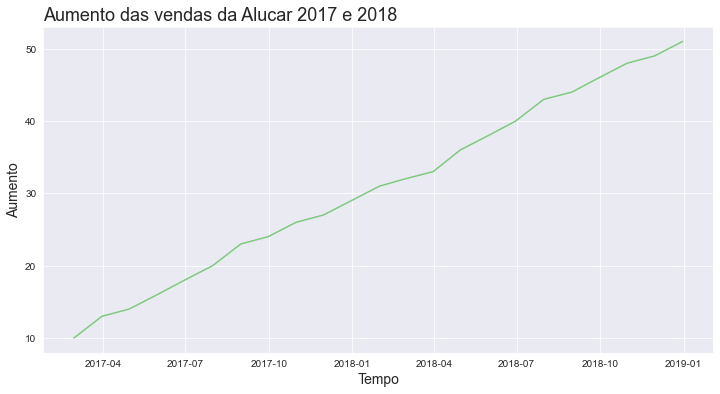

In [21]:
plotar('Aumento das vendas da Alucar 2017 e 2018', 'Tempo', 'Aumento',
      'mes','aumento_vendas', alucar)

In [23]:
alucar['aceleracao'] = alucar['aumento_vendas'].diff()
alucar.head()

,mes,vendas,aumento_vendas,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


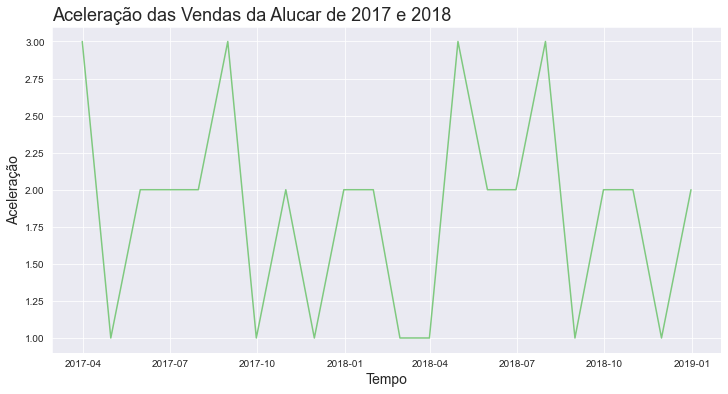

In [24]:
plotar('Aceleração das Vendas da Alucar de 2017 e 2018','Tempo','Aceleração','mes','aceleracao',alucar)

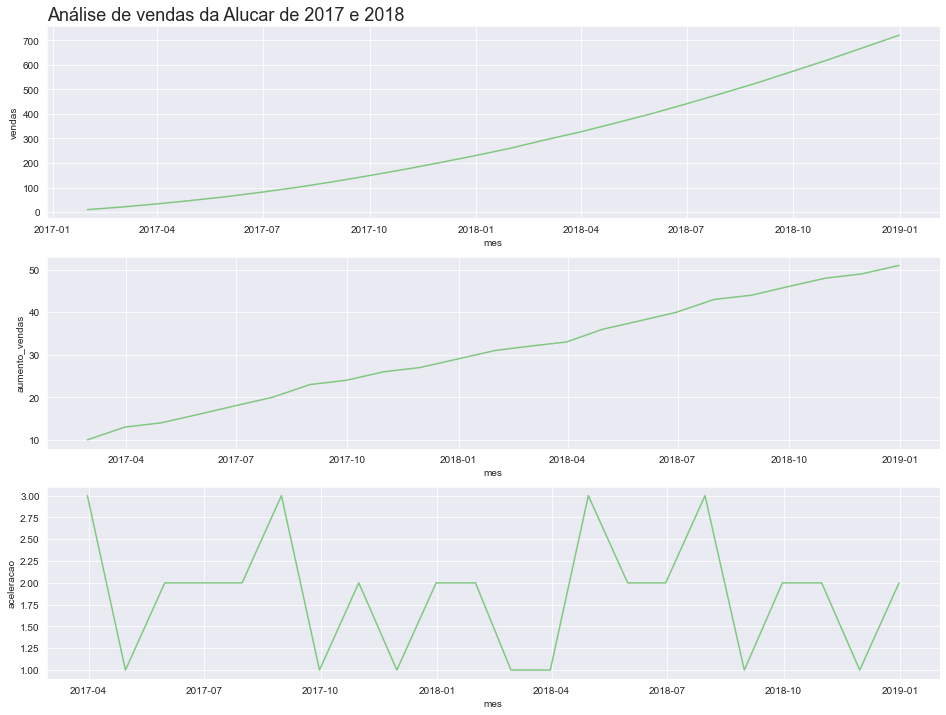

In [27]:
plt.figure(figsize=(16,12))
ax=plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18,loc='left')
sns.lineplot(x='mes',y='vendas',data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento_vendas',data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao',data=alucar)
ax=ax

In [28]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax=plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax=ax

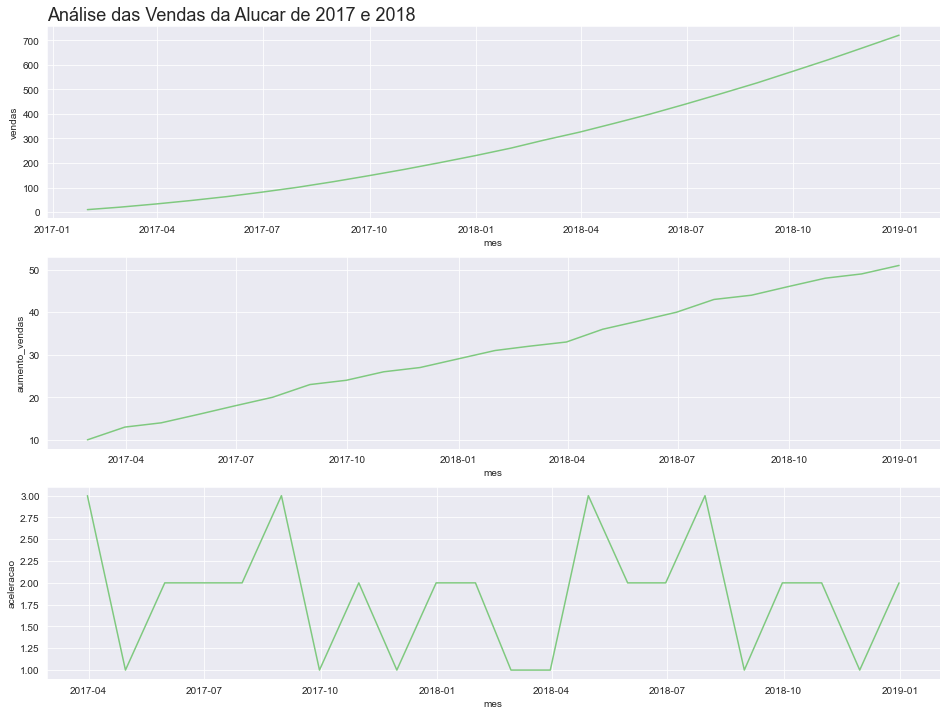

In [29]:
plot_comparacao('mes','vendas','aumento_vendas','aceleracao',
               alucar,'Análise das Vendas da Alucar de 2017 e 2018')

In [32]:
from pandas.plotting import autocorrelation_plot as atcp

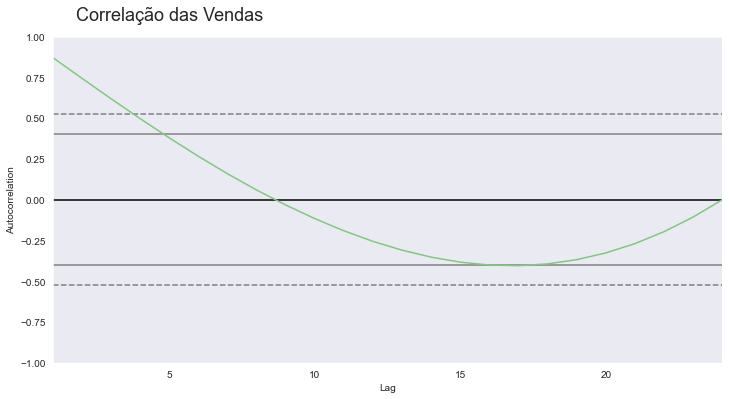

In [37]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas',fontsize=18,x=0.26, y=0.95)
atcp(alucar['vendas'])
ax=ax

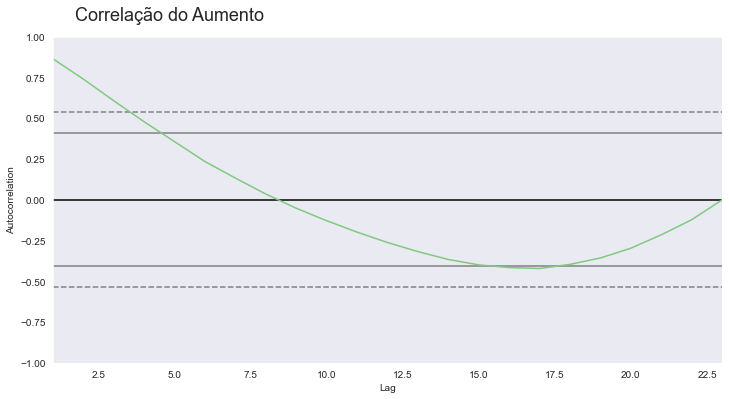

In [39]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento',fontsize=18,x=0.26, y=0.95)
atcp(alucar['aumento_vendas'][1:])
ax=ax

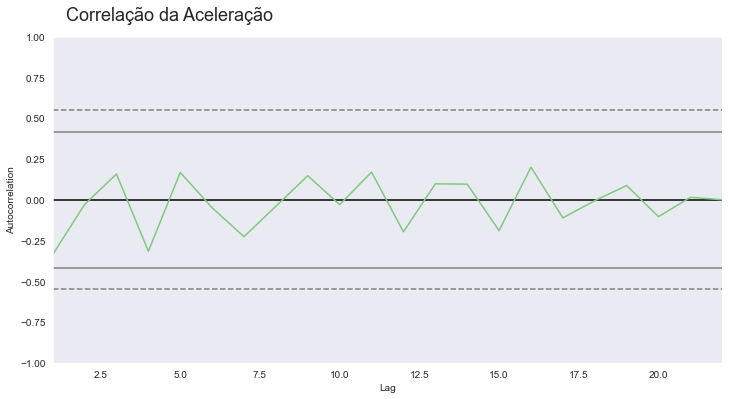

In [42]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração',fontsize=18,x=0.26, y=0.95)
atcp(alucar['aceleracao'][2:])
ax=ax

## Para entender os gráficos acima:

<img src='imagem/autocorrelacao.png'>

## Link útil:
> **Autocorrelação:** https://pt.wikipedia.org/wiki/Autocorrelação

# Impotância da decomposição e sazonalidade

## Alucar - Analisando assinantes da newsletter

In [43]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [44]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [45]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [48]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [49]:
assinantes['aumento']=assinantes['assinantes'].diff()
assinantes['aceleracao']=assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


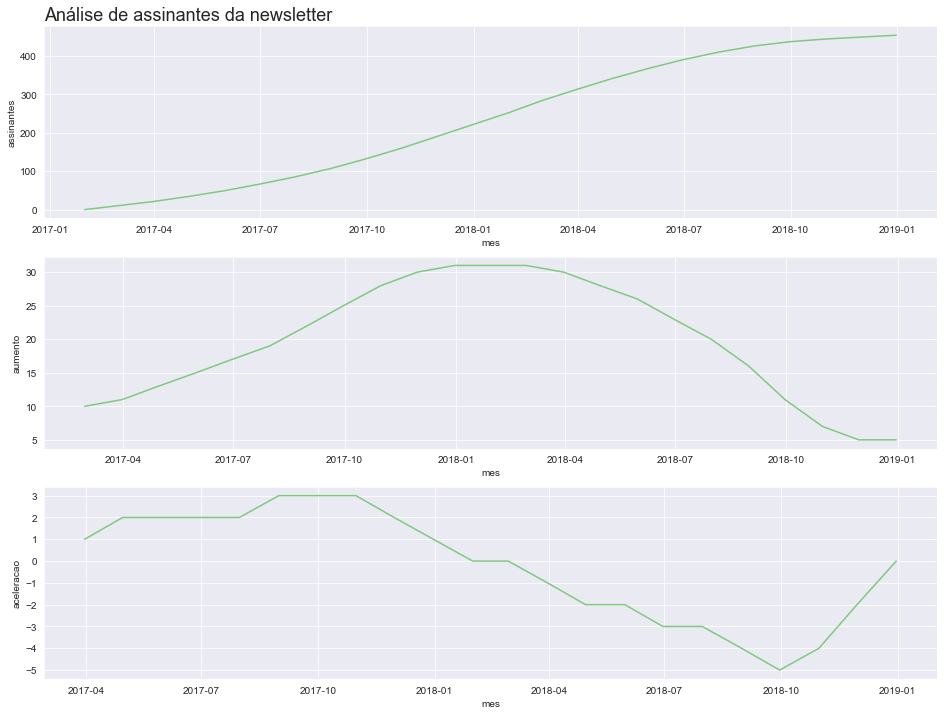

In [51]:
plot_comparacao('mes','assinantes','aumento','aceleracao',
               assinantes,'Análise de assinantes da newsletter')

## Chocolura - Análise das vendas

In [53]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [54]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [56]:
chocolura['mes'] = pd.to_datetime(chocolura['mes']) 
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [57]:
print('Quantidade de linhas e colunas: ', chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [59]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


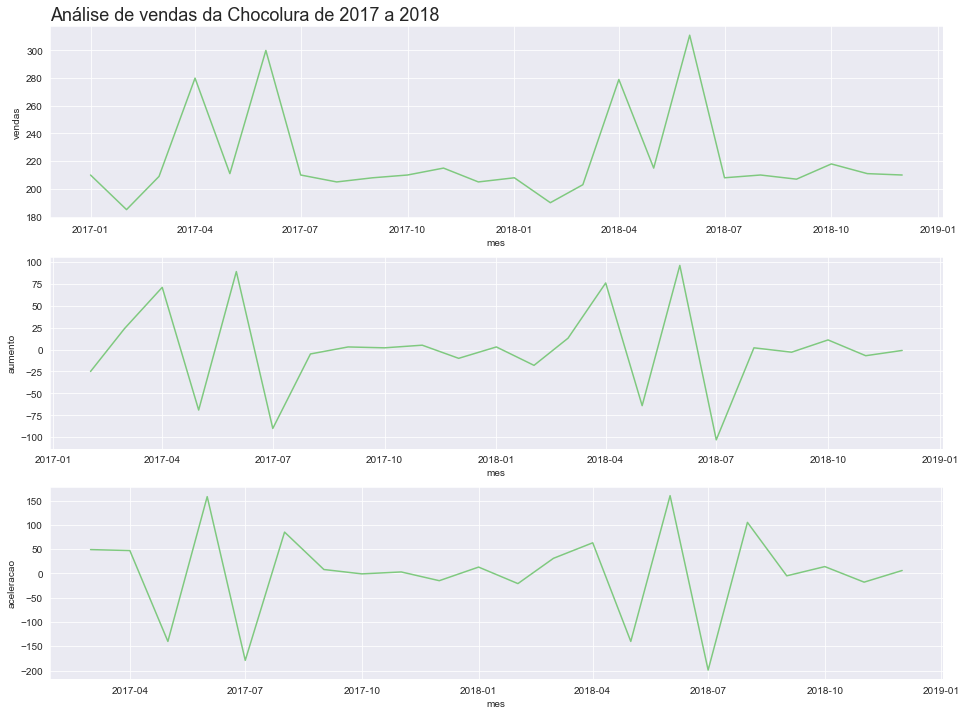

In [61]:
plot_comparacao('mes','vendas','aumento','aceleracao',
               chocolura,'Análise de vendas da Chocolura de 2017 a 2018')

## Chocolura - Vendas diárias (Outubro e Novembro)

In [63]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [64]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [65]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [67]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [68]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


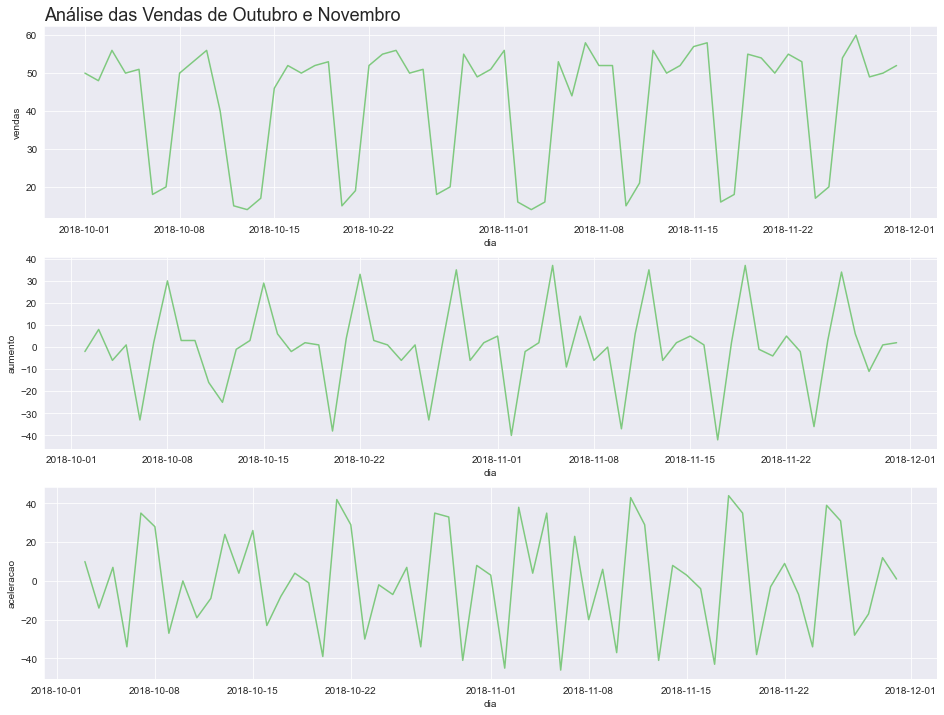

In [69]:
plot_comparacao('dia','vendas','aumento','aceleracao', vendas_por_dia,
                'Análise das Vendas de Outubro e Novembro')

**Analisando a sazonalidade:**

In [84]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [85]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [83]:
vendas_por_dia['dia_da_semana'].unique()

array([nan], dtype=object)

In [81]:
# dias_traduzidos = {'Monday':'Segunda',
#                    'Tuesday':'Terca',
#                    'Wednesday':'Quarta',
#                   'Thursday':'Quinta',
#                    'Friday':'Sexta',
#                    'Saturday':'Sabado',
#                    'Sunday':'Domingo'}

In [86]:
# vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos )
# vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday
7,2018-10-08,50,30.0,28.0,Monday
8,2018-10-09,53,3.0,-27.0,Tuesday
9,2018-10-10,56,3.0,0.0,Wednesday


**Agrupando os dias**

In [94]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas','aumento','aceleracao']].mean().round()

In [95]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0


## Normalização e statsmodels

**Correlação das vendas diárias**

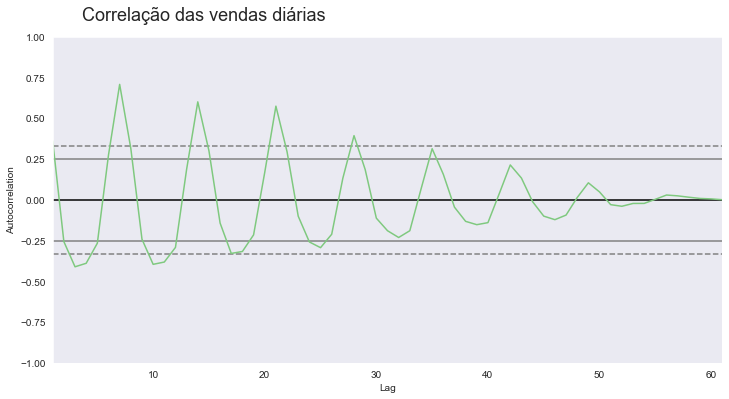

In [99]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18,x=0.3,y=0.95)
atcp(vendas_por_dia['vendas'])
ax = ax

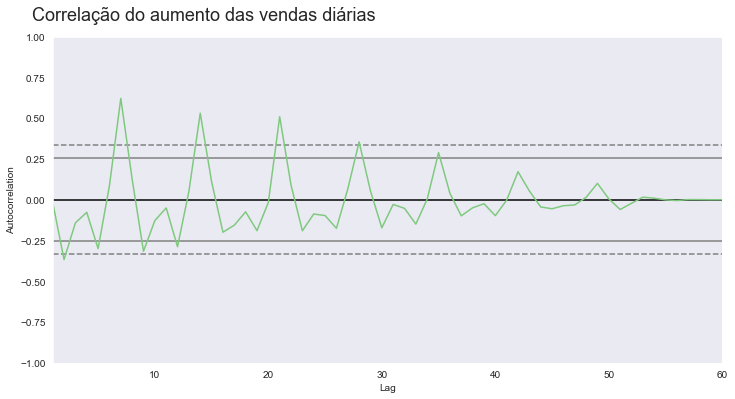

In [102]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18,x=0.3,y=0.95)
atcp(vendas_por_dia['aumento'][1:])
ax = ax

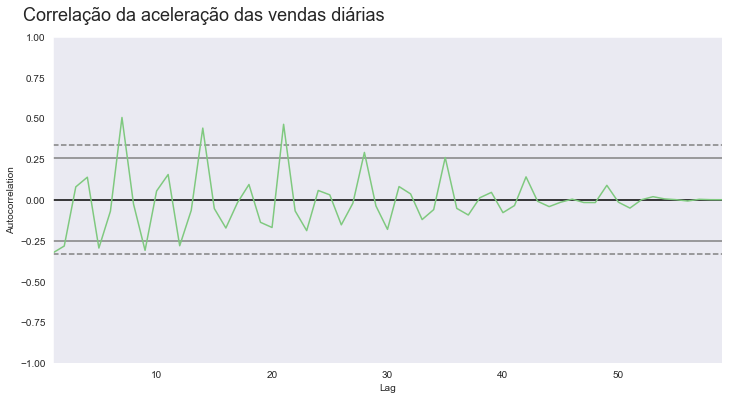

In [103]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18,x=0.3,y=0.95)
atcp(vendas_por_dia['aceleracao'][2:])
ax = ax

## Cafelura - Análises de Vendas

In [105]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [106]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [107]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [108]:
print('Quantidade de linhas e colunas: ', cafelura.shape)
print('Quantidade de dados nulos: ',cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


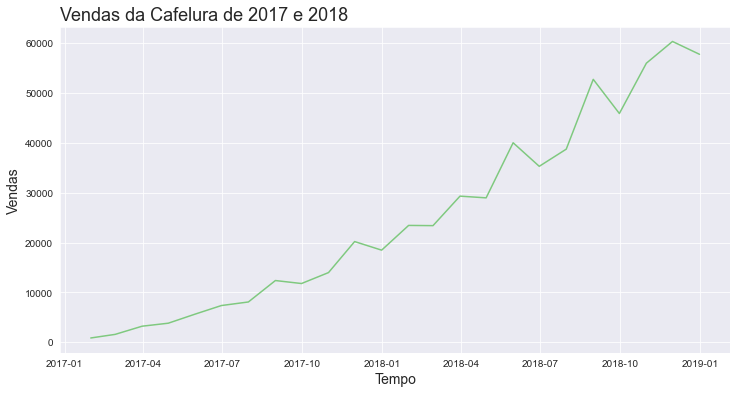

In [109]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas',
      'mes','vendas',cafelura)

In [110]:
quantidade_de_dias_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [111]:
quantidade_de_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [112]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


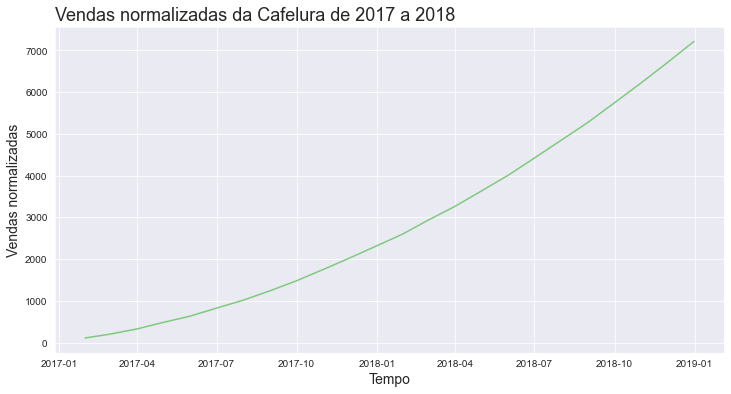

In [113]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018','Tempo','Vendas normalizadas',
      'mes','vendas_normalizadas', cafelura)

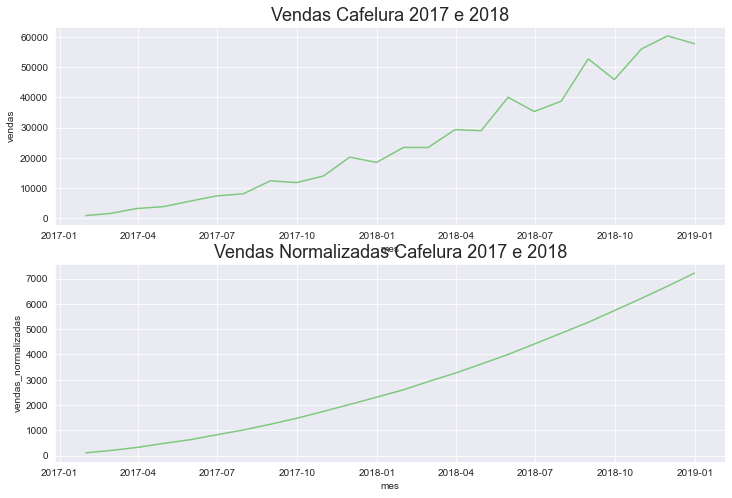

In [116]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018',fontsize=18)
sns.lineplot(x='mes',y='vendas',data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018',fontsize=18)
sns.lineplot(x='mes',y='vendas_normalizadas',data=cafelura)
ax=ax

# Statsmodels

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose as sdc

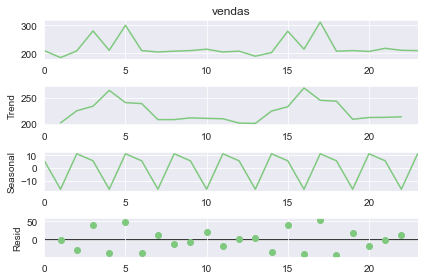

In [124]:
resultado = sdc(chocolura['vendas'], period=3)
ax = resultado.plot()

In [126]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [127]:
data = ({
    'observacao': observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


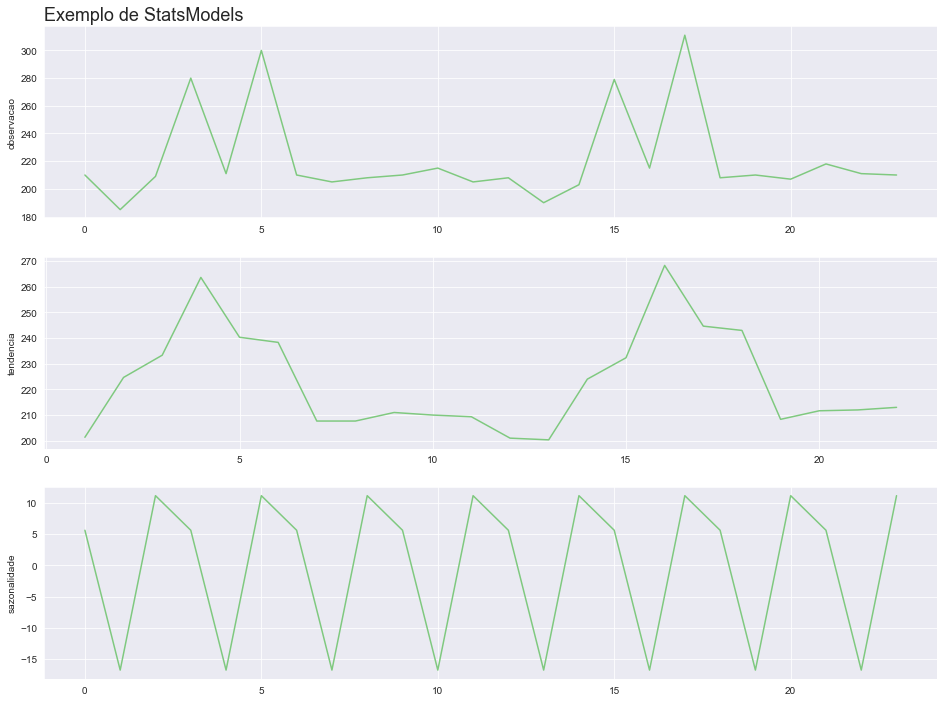

In [130]:
plot_comparacao(resultado.index,'observacao','tendencia','sazonalidade',
               resultado, 'Exemplo de StatsModels')

## Link útil
> **Tratando dados NAN no data set:** https://colab.research.google.com/drive/1UZFN5Jke6gFgYLNMbsU7eBJ9Pk9TdpIm#scrollTo=VFhdQHhV3pHY

## Alucel - Análise de Vendas

In [132]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [133]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [135]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [136]:
print('Quantidade de linhas e colunas: ', alucel.shape)
print('Quantidade de dados nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [137]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


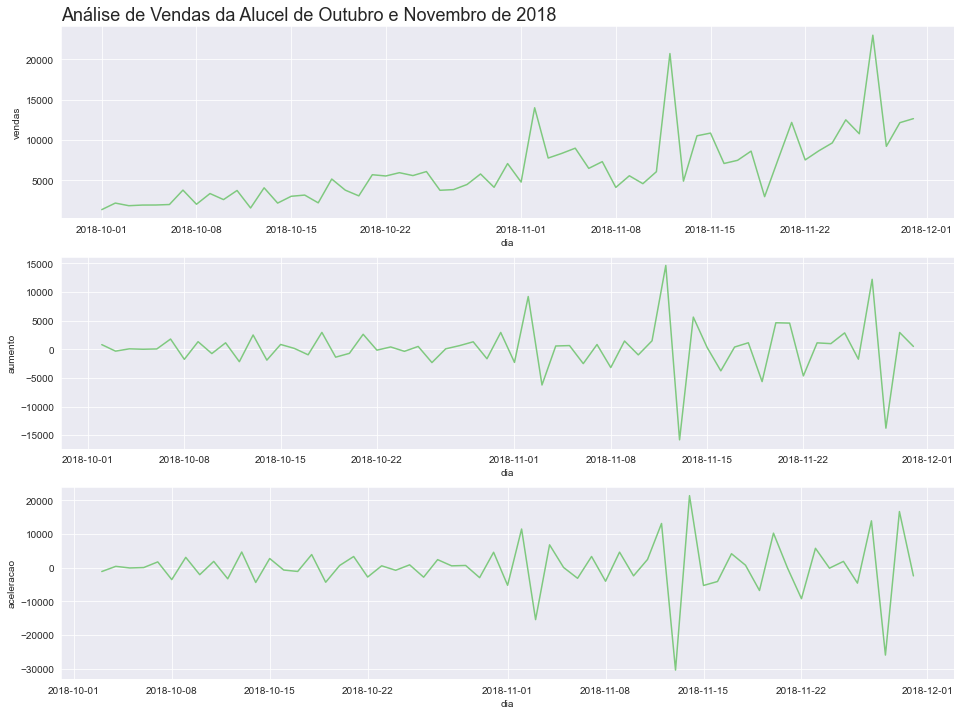

In [138]:
plot_comparacao('dia','vendas','aumento','aceleracao',
                alucel,'Análise de Vendas da Alucel de Outubro e Novembro de 2018')

**Média Móvel**

In [139]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [141]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


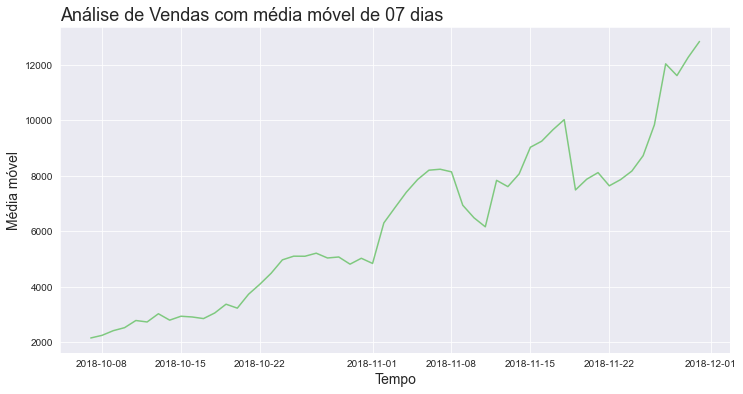

In [142]:
plotar('Análise de Vendas com média móvel de 07 dias',
      'Tempo', 'Média móvel',
      'dia', 'media_movel', alucel)

In [143]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

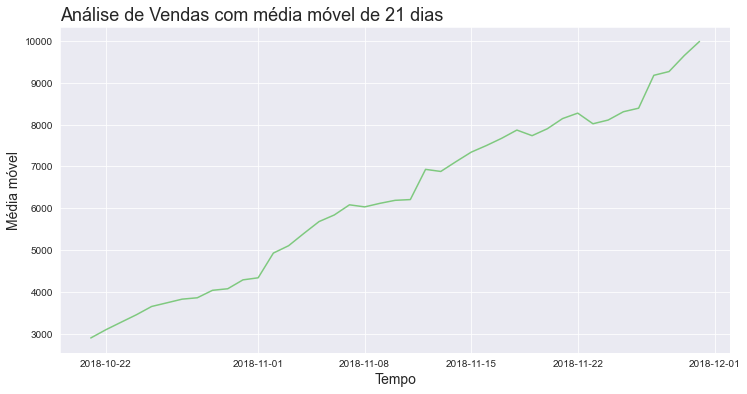

In [144]:
plotar('Análise de Vendas com média móvel de 21 dias',
      'Tempo', 'Média móvel',
      'dia', 'media_movel_21', alucel)

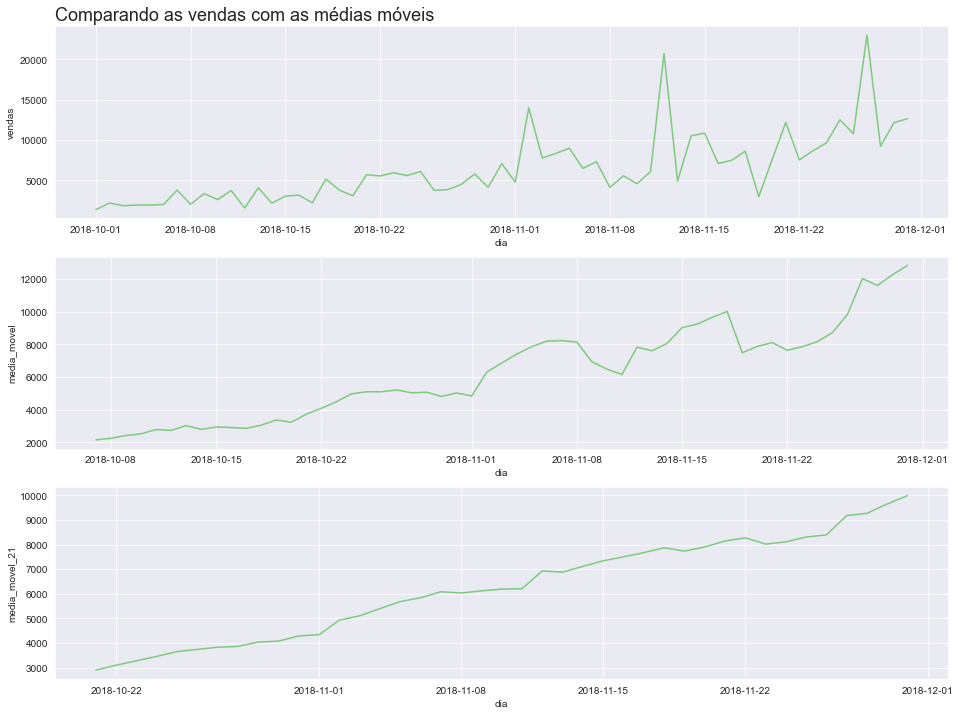

In [145]:
plot_comparacao('dia','vendas','media_movel','media_movel_21',
               alucel,'Comparando as vendas com as médias móveis')